In [ ]:
circuit.include('1N4148.mod')

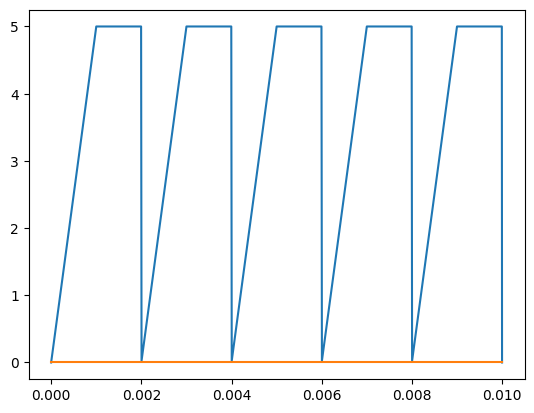

In [1]:
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

from PySpice.Logging.Logging import setup_logging
setup_logging()

# Load your SPICE models from a local library
spice_library = SpiceLibrary('./')

circuit = Circuit("Schmidt Trigger")

# Set up power supplies
circuit.V(1, 'VCC', circuit.gnd, 5 @ u_V)  # V2 = 5V

# Add the 2N3904 transistor using the SPICE model
circuit.include(spice_library['2N3904'])
circuit.BJT(1, 'OUT', 'B', 'E', model='2N3904')  # Use the BJT model

# Define resistors and other elements
circuit.R(1, 'B', circuit.gnd, 1 @ u_kΩ)
circuit.R(2, 'OUT', 'E', 1 @ u_kΩ)

# Define the triangle wave V1 (use a pulse to mimic it)
circuit.PulseVoltageSource(2, 'IN', circuit.gnd, initial_value=0 @ u_V, pulsed_value=5 @ u_V,
                           rise_time=1 @ u_ms, fall_time=1 @ u_ms, pulse_width=2 @ u_ms, period=2 @ u_ms)

# Setup simulation
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=10 @ u_us, end_time=10 @ u_ms)

# Plot input and output
plot(analysis['IN'])

plot(analysis['OUT'])

